In [1]:
import numpy as np
from StatisticalAnalysis import compare_methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

First we load the data and process it to have the correct form.

In [3]:
ts_hc = np.load('ts_hc.npy')
ts_schz = np.load('ts_schz.npy')

In [4]:
ts_hc = ts_hc.reshape(52,142*118)

In [5]:
ts_schz = ts_schz.reshape(50,142*118)

In [6]:
corr_hc = np.load('corr_hc.npy')
corr_schz = np.load('corr_schz.npy')

In [7]:
corr_hc = corr_hc.reshape(52,118*118)
corr_schz = corr_schz.reshape(50,118*118)

In [8]:
hc = np.append(ts_hc,corr_hc,axis=1)
schz = np.append(ts_schz,corr_schz,axis=1)

In [9]:
X = np.append(hc,schz,axis=0)

In [10]:
X.shape

(102, 30680)

In [11]:
X[0].shape

(30680,)

In [12]:
Y = np.append(np.zeros(52),np.ones(50),axis=0)

In [13]:
Y.shape

(102,)

Now, we define the algorithms that we are going to use. 

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint as sp_randint

In [15]:
# Decision tree
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Logistic regression
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Neural Network
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}
# RandomForest
clfRF = RandomForestClassifier(random_state=84)
param_distRF =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}
# ExtraTreesClassifier
clfET = ExtraTreesClassifier(random_state=84)
param_distET =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}

In [16]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP,clfRF,clfET]

In [17]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP,param_distRF, param_distET]

In [18]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP","RF","ET"]

# Plain comparison

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.533095 (0.192870)
SVM: 0.701548 (0.141779)
KNN: 0.735952 (0.131182)
LR: 0.697381 (0.142105)
MLP: 0.671071 (0.129800)
RF: 0.678929 (0.138983)
ET: 0.683869 (0.197006)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.948848, p:0.006313
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.594420, p:0.733602
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

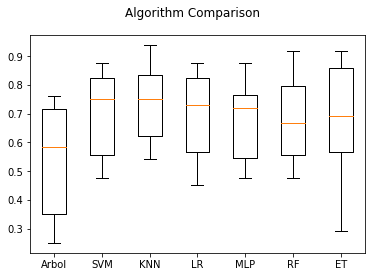

In [24]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

# PCA with 2 components

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)

In [27]:
pca.fit(X)

PCA(n_components=2)

In [28]:
X_pca2 = pca.transform(X)

In [29]:
X_pca2.shape

(102, 2)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.681190 (0.136258)
SVM: 0.652083 (0.162231)
KNN: 0.646726 (0.152699)
LR: 0.555179 (0.198608)
MLP: 0.555238 (0.130202)
RF: 0.669583 (0.196566)
ET: 0.650714 (0.199543)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.964715, p:0.045837
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.381421, p:0.888216
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

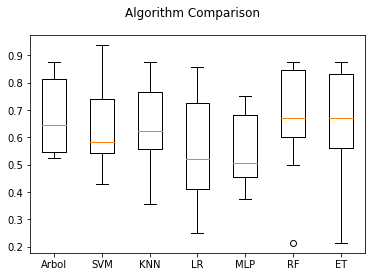

In [30]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='auroc')

# PCA with 10 components

In [31]:
pca = PCA(n_components=10)

In [32]:
pca.fit(X)

PCA(n_components=10)

In [33]:
X_pca10 = pca.transform(X)

In [34]:
!mv temp.csv temppca2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.432500 (0.119613)
SVM: 0.687976 (0.146808)
KNN: 0.607738 (0.142918)
LR: 0.742024 (0.098265)
MLP: 0.605714 (0.078325)
RF: 0.645298 (0.149571)
ET: 0.611964 (0.142189)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.981205, p:0.375684
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.691065, p:0.657582
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

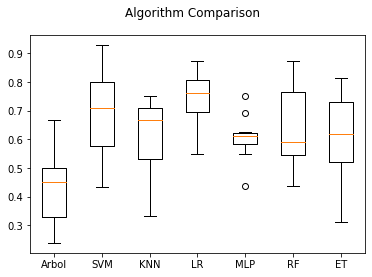

In [35]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [36]:
!mv temp.csv temppca10.csv

# PCA with 100 components

In [37]:
pca = PCA(n_components=100)

In [38]:
pca.fit(X)

PCA(n_components=100)

In [39]:
X_pca100 = pca.transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.486250 (0.164736)
SVM: 0.720298 (0.158374)
KNN: 0.738810 (0.135382)
LR: 0.717024 (0.138283)
MLP: 0.554226 (0.138358)
RF: 0.536429 (0.125664)
ET: 0.527024 (0.145345)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.979387, p:0.302334
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.284352, p:0.942293
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

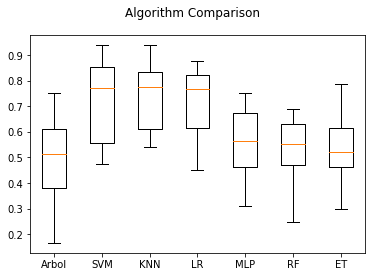

In [40]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [41]:
!mv temp.csv temppca100.csv

# TSNE with 2 components

In [42]:
from sklearn.manifold import TSNE

In [43]:
Xtsne2 = TSNE(n_components=2).fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.591429 (0.192361)
SVM: 0.629286 (0.105633)
KNN: 0.621964 (0.116702)
LR: 0.600238 (0.133684)
MLP: 0.616190 (0.149150)
RF: 0.568214 (0.122650)
ET: 0.609881 (0.169852)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.980194, p:0.333282
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.011126, p:0.426252
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

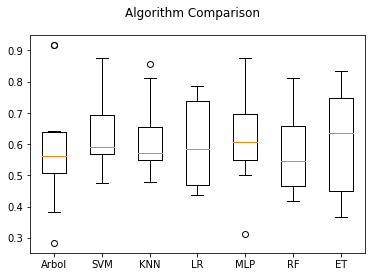

In [44]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [45]:
!mv temp.csv temptsne2.csv

# TSNE with 3 components

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.449940 (0.143343)
SVM: 0.491310 (0.162705)
KNN: 0.486429 (0.154682)
LR: 0.495179 (0.166474)
MLP: 0.475000 (0.216932)
RF: 0.509583 (0.219769)
ET: 0.445774 (0.141090)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.984389, p:0.534557
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.232547, p:0.964424
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are fulfilled
-

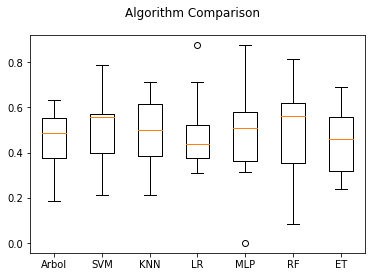

In [46]:
Xtsne3 = TSNE(n_components=3).fit_transform(X)
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [47]:
!mv temp.csv temptsne3.csv

# UMAP with 2 components

In [48]:
from umap import UMAP

In [49]:
reducer = UMAP()

In [50]:
Xumap = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.713512 (0.100342)
SVM: 0.619405 (0.126582)
KNN: 0.548452 (0.172444)
LR: 0.633988 (0.099826)
MLP: 0.592202 (0.112492)
RF: 0.643988 (0.137631)
ET: 0.602024 (0.103480)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.979310, p:0.299522
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.822337, p:0.556876
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

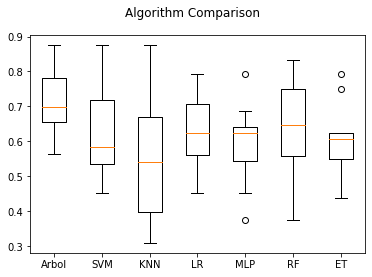

In [51]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [52]:
!mv temp.csv tempumap2.csv

# UMAP with 10 components

In [53]:
reducer = UMAP(n_components=10)

In [54]:
Xumap10 = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.570179 (0.163457)
SVM: 0.646548 (0.190549)
KNN: 0.680417 (0.163163)
LR: 0.636429 (0.143818)
MLP: 0.607560 (0.144225)
RF: 0.669881 (0.143222)
ET: 0.676250 (0.138491)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.980440, p:0.343247
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.371771, p:0.894228
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

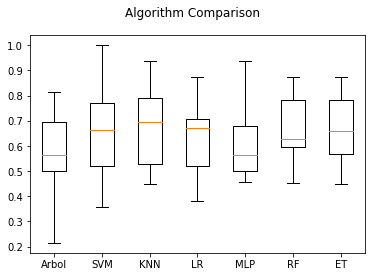

In [55]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [56]:
!mv temp.csv tempumap10.csv

# Isomap

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.493333 (0.095411)
SVM: 0.542321 (0.154314)
KNN: 0.524762 (0.104206)
LR: 0.556488 (0.177798)
MLP: 0.518988 (0.163794)
RF: 0.540417 (0.094002)
ET: 0.559107 (0.094407)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.979771, p:0.316777
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.652645, p:0.147613
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

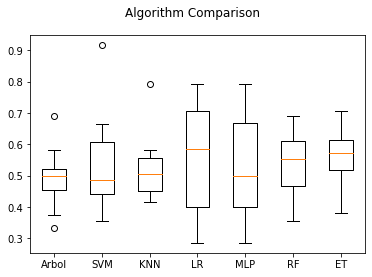

In [19]:
from sklearn import manifold
clf = manifold.Isomap(10, n_components=2)
X_iso2 = clf.fit_transform(X)
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='auroc')
!mv temp.csv tempiso2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.625060 (0.178524)
SVM: 0.570536 (0.066337)
KNN: 0.687560 (0.147550)
LR: 0.627440 (0.101724)
MLP: 0.634286 (0.106315)
RF: 0.644107 (0.148000)
ET: 0.665238 (0.171602)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.979548, p:0.308329
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.417655, p:0.221961
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

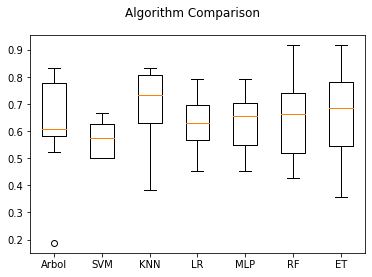

In [20]:
clf = manifold.Isomap(10, n_components=10)
X_iso10 = clf.fit_transform(X)
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='auroc')

# LLE

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.589524 (0.113279)
SVM: 0.580000 (0.136367)
KNN: 0.550714 (0.162354)
LR: 0.612024 (0.163988)
MLP: 0.568274 (0.153787)
RF: 0.513929 (0.179956)
ET: 0.581071 (0.137999)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.987344, p:0.706468
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.092054, p:0.996922
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are fulfilled
-

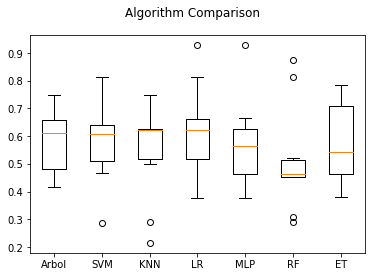

In [25]:
clf = manifold.LocallyLinearEmbedding(10, n_components=2,method='standard')
X_lle2 = clf.fit_transform(X)
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.557083 (0.127544)
SVM: 0.663750 (0.086304)
KNN: 0.706607 (0.166654)
LR: 0.680714 (0.138249)
MLP: 0.675357 (0.131825)
RF: 0.733690 (0.130467)
ET: 0.697798 (0.171536)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.983534, p:0.488352
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.595982, p:0.163111
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

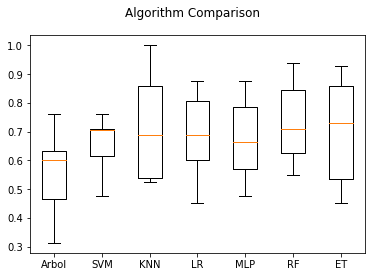

In [23]:
clf = manifold.LocallyLinearEmbedding(10, n_components=10,method='standard')
X_lle10 = clf.fit_transform(X)
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.614107 (0.182826)
SVM: 0.513095 (0.113589)
KNN: 0.483095 (0.026480)
LR: 0.487202 (0.098278)
MLP: 0.511845 (0.098569)
RF: 0.654464 (0.098363)
ET: 0.547024 (0.126751)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.927299, p:0.000560
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.657469, p:0.023145
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

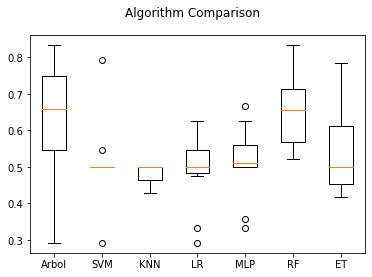

In [24]:
clf = manifold.LocallyLinearEmbedding(10, n_components=100,method='standard')
X_lle100 = clf.fit_transform(X)
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='auroc')

# MDS

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.519107 (0.148926)
SVM: 0.562619 (0.160348)
KNN: 0.532440 (0.106658)
LR: 0.499940 (0.124366)
MLP: 0.549167 (0.108702)
RF: 0.462381 (0.129038)
ET: 0.469226 (0.185019)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.979836, p:0.319277
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.940125, p:0.472932
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

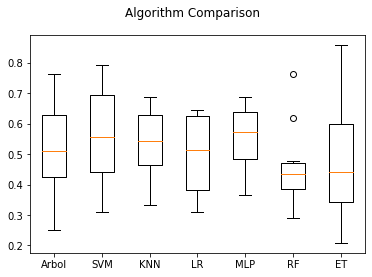

In [26]:
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds2 = clf.fit_transform(X)
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.559464 (0.139647)
SVM: 0.669167 (0.094539)
KNN: 0.626726 (0.150858)
LR: 0.513214 (0.117107)
MLP: 0.541964 (0.133455)
RF: 0.607857 (0.126734)
ET: 0.650000 (0.094596)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.983462, p:0.484586
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.252354, p:0.956578
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

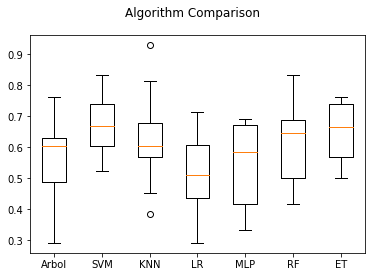

In [27]:
clf = manifold.MDS(n_components=10, n_init=1, max_iter=100)
X_mds10 = clf.fit_transform(X)
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.423869 (0.187925)
SVM: 0.572143 (0.145275)
KNN: 0.540595 (0.144956)
LR: 0.477143 (0.148202)
MLP: 0.577440 (0.158074)
RF: 0.481429 (0.144363)
ET: 0.616012 (0.115504)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.972637, p:0.128475
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.722030, p:0.633373
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

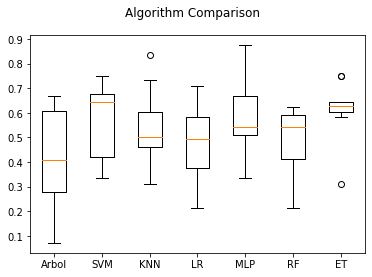

In [28]:
clf = manifold.MDS(n_components=100, n_init=1, max_iter=100)
X_mds100 = clf.fit_transform(X)
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='auroc')